# Imports

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from shapely.geometry import Point

from utils import *

In [2]:
data = pd.read_excel(r"C:\Users\bruna\Documents\Bruna\school\IMS\MGI\A1\S1\DM1_DataMining1\Project\NOVAIMS_projectData_B2C_2024e25.xlsx")

In [3]:
data

,ID_Client,Frequency_items,Potencial_Score,ZIP_Code,Longevity_months,Latitude,Longitude,Credit_factor,Relevance_criteria,Store_state,...,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
0,10156431SEG17NKID781,38,-0.400000,0,23,0.000000,-1.666667,0.7,Priority,NSW,...,59,"88,000",148,150.0,105,27,24,27.0,10,0
1,9056576FIA11NKID679,50,-0.300000,0,24,0.200000,0.000000,0.7,Priority,NSW,...,7,"90,000",134,26.0,20,31,-12,2.0,18,2
2,9253304IST6NKID248,48,1.600000,0,32,0.428571,1.000000,0.7,Priority,NSW,...,0,"89,000",39,-6.0,25,32,17,33.0,26,-13
3,9661067PER12NKID393,46,-0.900000,0,-4,-0.400000,-0.500000,4.5,Priority,NSW,...,0,"89,000",26,66.0,16,29,31,28.0,-2,8
4,9956825FEG11NKID326,31,31.607792,8,10,1.000000,0.714286,0.7,Priority,NSW,...,0,"90,000",-2,57.0,27,45,46,19.0,23,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123678,9858426mGE8NKID484,33,79.604090,4,21,58.698146,17.428185,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0
123679,9869176MÓR4NKID483,37,0.300000,0,-5,4.000000,-0.800000,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0
123680,992916PER8NKID237,43,79.171572,8,11,60.652785,20.731272,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0
123681,994681RNA13NKID439,75,33.309170,8,31,57.199647,14.395124,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0


In [4]:
data.dtypes

numeric = ['Frequency_items', 'Potencial_Score', 'Longevity_months', 'Latitude', 'Longitude', 'Credit_factor', 'Recency_in_weeks', 'Returns', 'ID_Store_last', 'Flaged', 'Promotional_percentage', 
           'Checked_ok', 'Beer', 'Bottled_Water', 'Bread', 'Meat', 'Fresh_Foods', 'Frozen_Foods', 'Fruit_Beverages', 'Pastry', 'Sodas', 'Toiletries', 'Veggies', 'Wines']
cat = ['ID_Client', 'ZIP_Code', 'Relevance_criteria', 'Store_state', 'Gender', 'Education', 'Dairy']

In [5]:
data[numeric].describe()

,Frequency_items,Potencial_Score,Longevity_months,Latitude,Longitude,Credit_factor,Recency_in_weeks,Returns,ID_Store_last,Flaged,...,Bread,Meat,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
count,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.0,123683.000000,...,123683.000000,123683.000000,123683.000000,123057.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000,123683.000000
mean,38.261224,30.392316,13.665354,25.249363,6.158188,0.899913,11.244706,4.310972,1.0,0.010373,...,29.886233,4.413606,62.666826,74.222564,49.562155,51.366865,36.884891,19.181545,23.499664,16.204216
std,13.594001,99.673585,9.881178,29.997630,7.697199,0.799920,3.799946,27.629597,0.0,0.101639,...,74.543595,65.663578,142.515009,135.669123,78.762338,52.097284,97.267381,18.939219,167.137181,59.304674
min,1.000000,-1.000000,-12.000000,-5.000000,-5.000000,0.000000,-4.000000,-87.000000,1.0,0.000000,...,-49.000000,-53.000000,-33.000000,-35.000000,-17.000000,0.000000,-954.000000,-24.000000,-45.000000,-85.000000
25%,29.000000,0.800000,6.000000,-0.166667,-0.166667,0.700000,9.000000,0.000000,1.0,0.000000,...,25.000000,0.000000,28.000000,30.000000,17.000000,28.000000,12.000000,9.000000,7.000000,4.000000
50%,37.000000,24.058840,13.000000,1.000000,1.000000,0.700000,11.000000,0.000000,1.0,0.000000,...,29.000000,0.000000,45.000000,60.000000,28.000000,32.000000,32.000000,19.000000,18.000000,13.000000
75%,47.000000,39.701604,21.000000,60.126211,13.971501,1.000000,14.000000,0.000000,1.0,0.000000,...,32.000000,0.000000,100.000000,109.000000,90.000000,47.000000,52.000000,27.000000,30.000000,23.000000
max,131.000000,11481.040829,45.000000,72.170287,30.973885,28.400000,18.000000,591.000000,1.0,2.000000,...,8546.000000,6771.000000,23100.000000,12806.000000,9828.000000,3592.000000,5981.000000,1612.000000,28375.000000,9621.000000


FREQUENCY_ITEMS


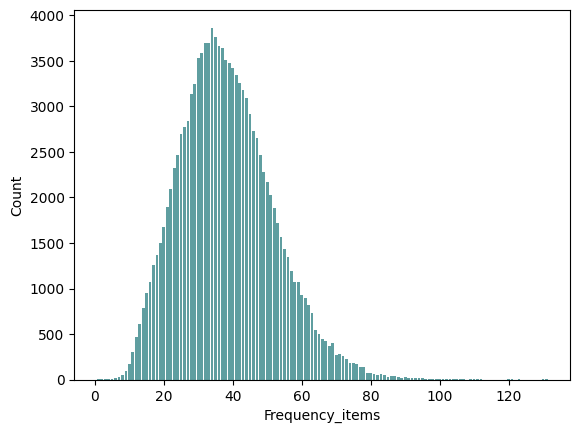

POTENCIAL_SCORE


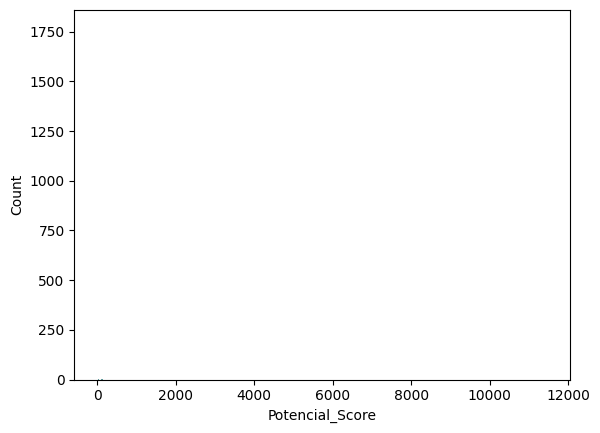

LONGEVITY_MONTHS


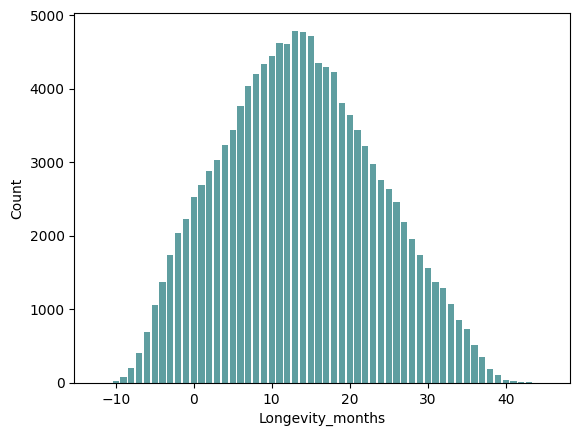

LATITUDE


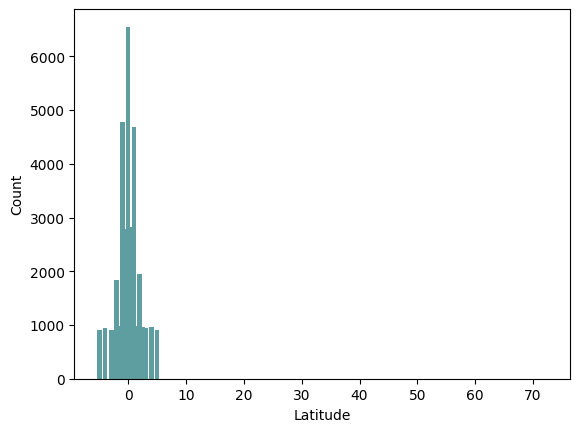

LONGITUDE


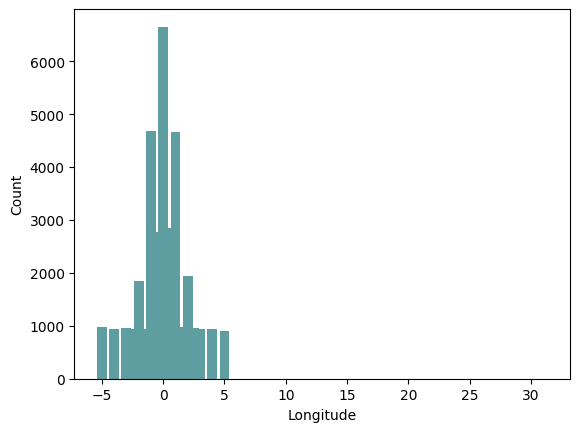

CREDIT_FACTOR


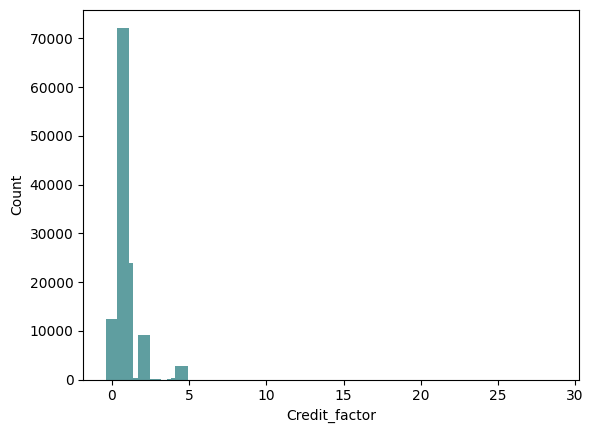

RECENCY_IN_WEEKS


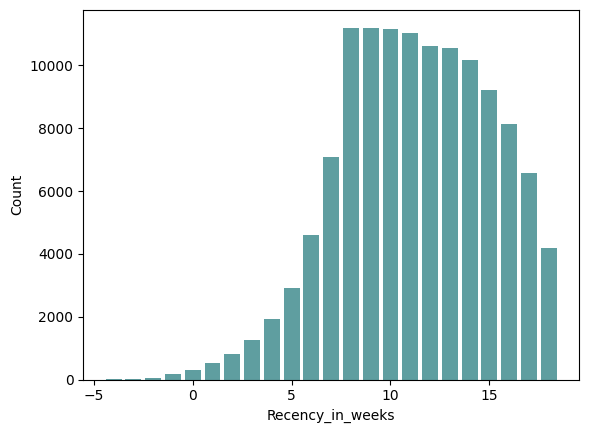

RETURNS


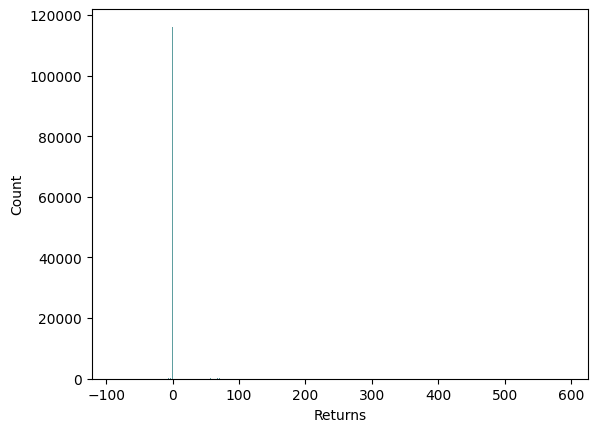

ID_STORE_LAST


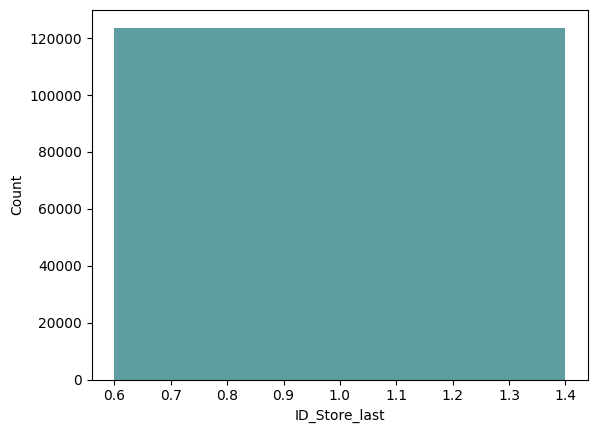

FLAGED


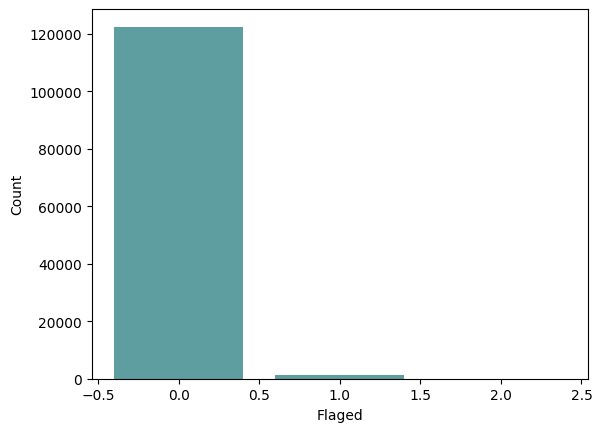

PROMOTIONAL_PERCENTAGE


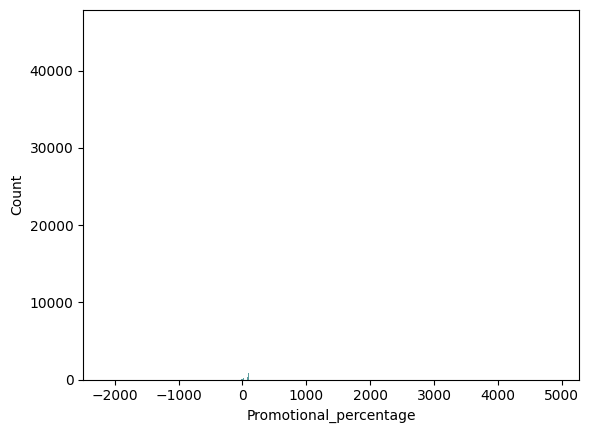

CHECKED_OK


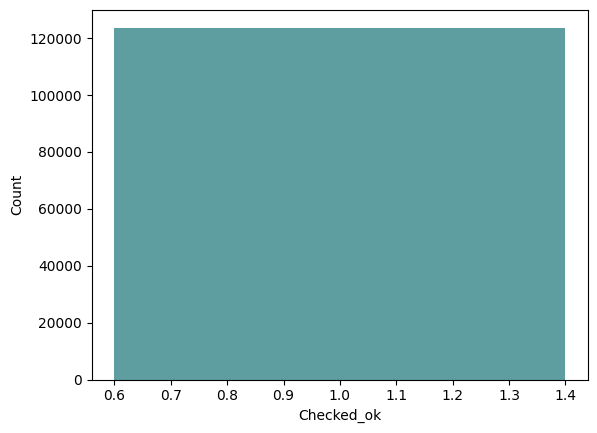

BEER


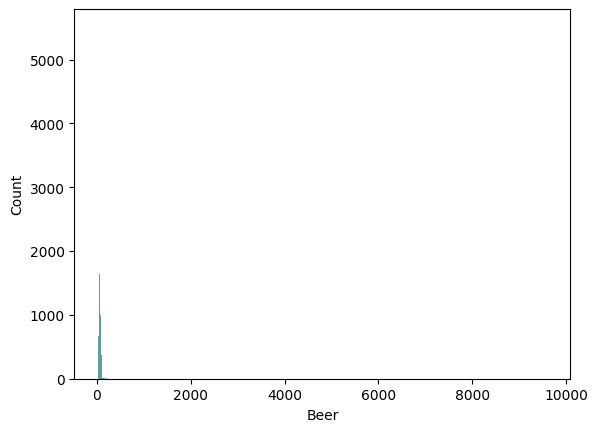

BOTTLED_WATER


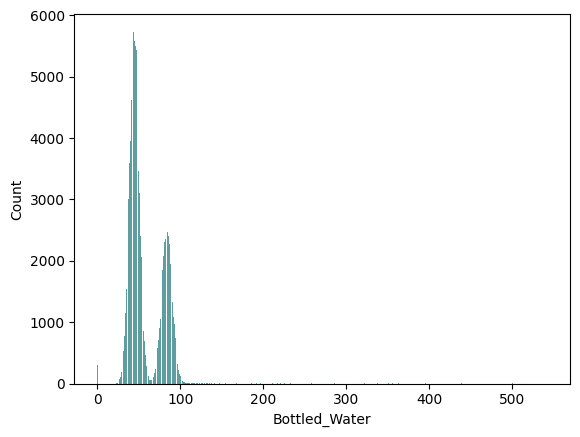

BREAD


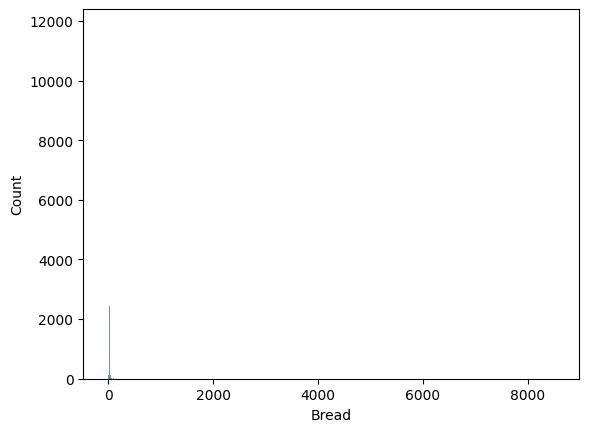

MEAT


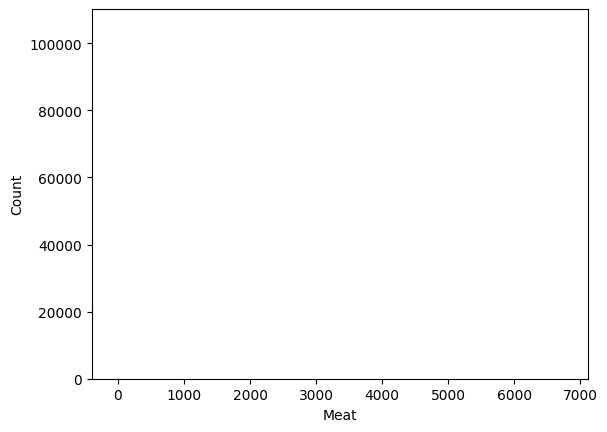

FRESH_FOODS


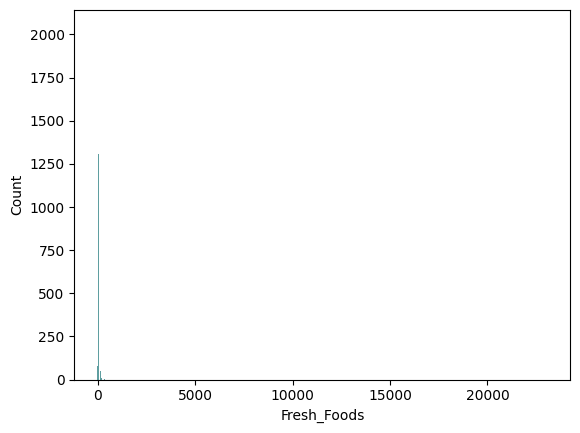

FROZEN_FOODS


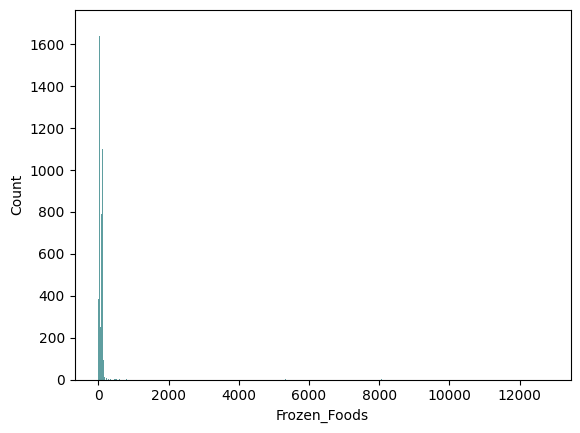

FRUIT_BEVERAGES


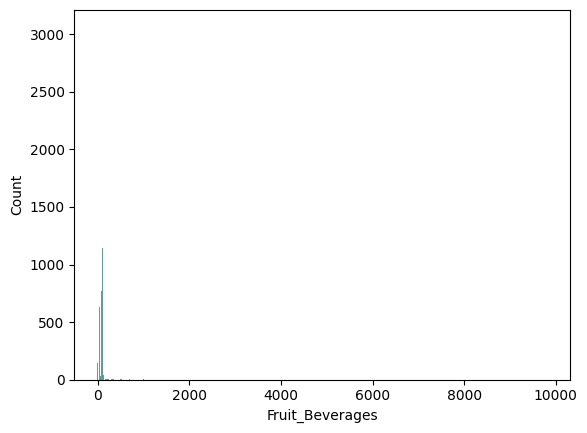

PASTRY


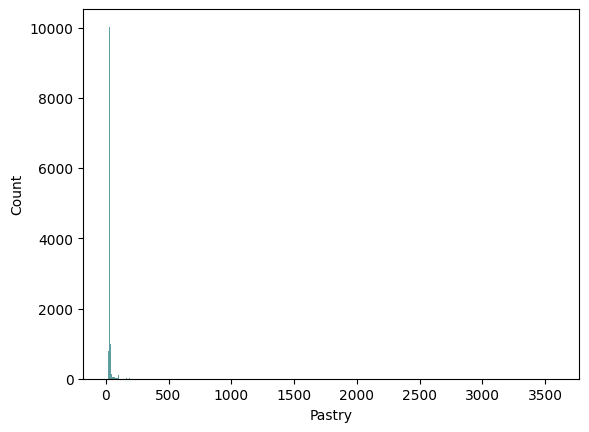

SODAS


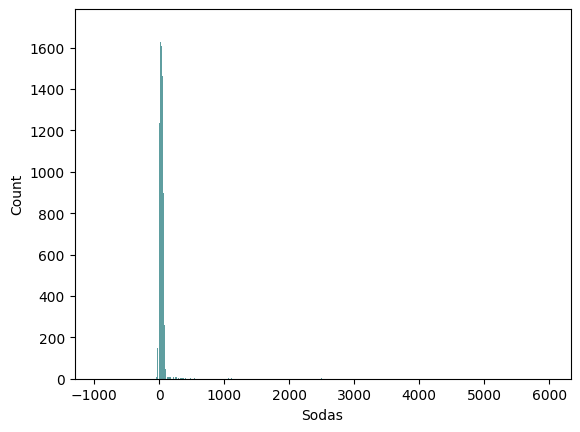

TOILETRIES


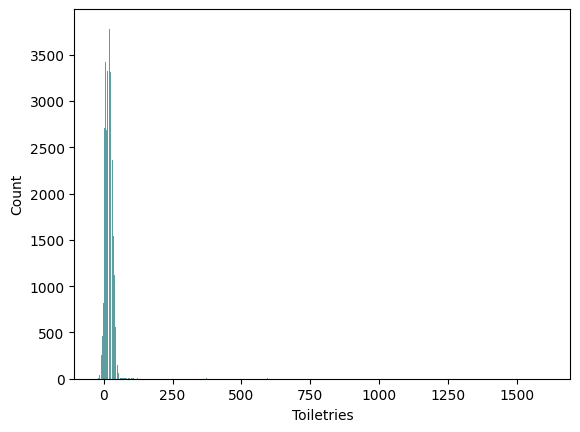

VEGGIES


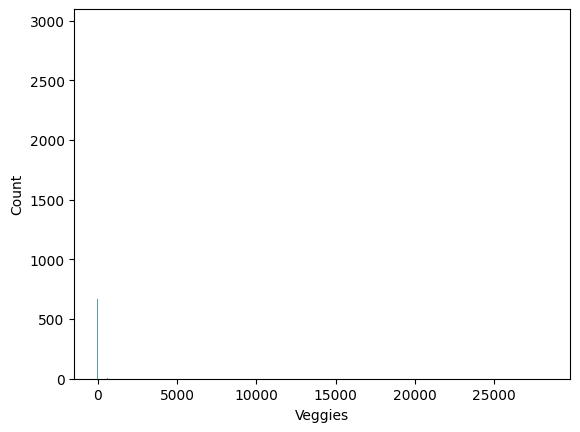

WINES


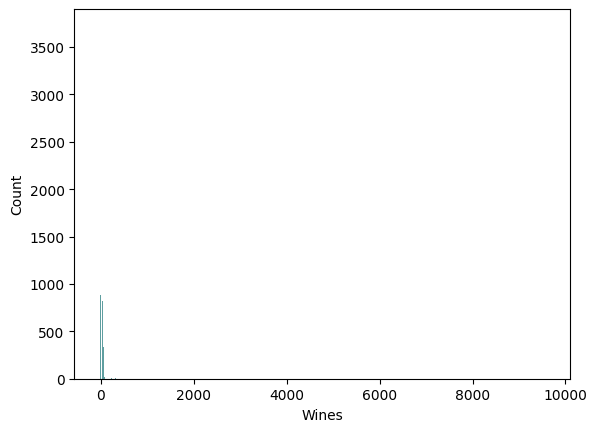

In [9]:
for col in numeric:
    print(col.upper())
    plot_bar_chart(data[numeric], col)

In [16]:
map(data, Point)

TypeError: 'type' object is not iterable

In [52]:
data[data['Latitude']<20].describe()

,Frequency_items,Potencial_Score,Longevity_months,Latitude,Longitude,Credit_factor,Recency_in_weeks,Returns,ID_Store_last,Flaged,...,Bread,Meat,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
count,72264.000000,72264.000000,72264.000000,72264.000000,72264.000000,72264.000000,72264.000000,72264.000000,72264.0,72264.000000,...,72264.000000,72264.000000,72264.000000,71885.000000,72264.000000,72264.000000,72264.000000,72264.000000,72264.000000,72264.000000
mean,39.182871,17.411579,12.412183,0.008158,0.000023,0.963969,11.597434,3.579376,1.0,0.007445,...,29.205981,2.725313,61.431252,71.541212,49.297603,50.046538,33.109958,18.871222,22.414217,16.103191
std,12.918770,126.641844,9.817962,1.463111,1.469936,0.936431,3.670763,25.640064,0.0,0.086604,...,83.027318,48.763057,177.480818,124.986738,91.318746,49.050831,68.042049,17.694843,213.527075,73.900583
min,1.000000,-1.000000,-12.000000,-5.000000,-5.000000,0.000000,-4.000000,-87.000000,1.0,0.000000,...,-49.000000,-53.000000,-33.000000,-35.000000,-17.000000,0.000000,-954.000000,-24.000000,-45.000000,-85.000000
25%,30.000000,0.100000,5.000000,-0.666667,-0.666667,0.700000,9.000000,0.000000,1.0,0.000000,...,25.000000,0.000000,27.000000,30.000000,17.000000,28.000000,11.000000,9.000000,7.000000,4.000000
50%,38.000000,1.200000,12.000000,0.000000,0.000000,0.700000,12.000000,0.000000,1.0,0.000000,...,29.000000,0.000000,44.000000,57.000000,28.000000,31.000000,31.000000,19.000000,18.000000,13.000000
75%,47.000000,26.209778,19.000000,0.666667,0.666667,1.000000,15.000000,0.000000,1.0,0.000000,...,31.000000,0.000000,99.000000,108.000000,89.000000,40.000000,50.000000,27.000000,29.000000,23.000000
max,131.000000,11481.040829,43.000000,5.000000,5.000000,28.400000,18.000000,591.000000,1.0,2.000000,...,8546.000000,2783.000000,23100.000000,12806.000000,9828.000000,3592.000000,5261.000000,1612.000000,28375.000000,9621.000000


In [53]:
data[data['Latitude']>20].describe()

,Frequency_items,Potencial_Score,Longevity_months,Latitude,Longitude,Credit_factor,Recency_in_weeks,Returns,ID_Store_last,Flaged,...,Bread,Meat,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
count,51419.000000,51419.000000,51419.000000,51419.000000,51419.000000,51419.000000,51419.000000,51419.000000,51419.0,51419.000000,...,51419.000000,51419.000000,51419.000000,51172.000000,51419.000000,51419.000000,51419.000000,51419.000000,51419.000000,51419.000000
mean,36.965946,48.635378,15.426554,60.723224,14.812843,0.809888,10.748984,5.339155,1.0,0.014489,...,30.842257,6.786324,64.403295,77.989252,49.933954,53.222447,42.190163,19.617671,25.025146,16.346195
std,14.390577,28.066825,9.699521,2.773031,3.357787,0.541193,3.921175,30.175273,0.0,0.119495,...,60.634691,83.785555,67.681849,149.310712,56.586229,56.047761,127.290092,20.553416,55.798078,28.011091
min,2.000000,-1.000000,-10.000000,47.688114,-0.364993,0.000000,-4.000000,-46.000000,1.0,0.000000,...,0.000000,-11.000000,-24.000000,-28.000000,-14.000000,0.000000,-53.000000,-23.000000,-41.000000,-33.000000
25%,26.000000,27.731234,8.000000,58.966027,12.591544,0.700000,8.000000,0.000000,1.0,0.000000,...,25.000000,0.000000,28.000000,31.000000,17.000000,29.000000,13.000000,10.000000,7.000000,5.000000
50%,35.000000,35.562951,15.000000,60.812219,14.801803,0.700000,11.000000,0.000000,1.0,0.000000,...,29.000000,0.000000,46.000000,64.000000,29.000000,32.000000,33.000000,19.000000,19.000000,13.000000
75%,46.000000,79.158884,22.000000,62.569423,17.014960,1.000000,14.000000,0.000000,1.0,0.000000,...,32.000000,0.000000,101.000000,110.000000,90.000000,61.000000,54.000000,28.000000,31.000000,24.000000
max,121.000000,158.178123,45.000000,72.170287,30.973885,9.000000,18.000000,562.000000,1.0,1.000000,...,4266.000000,6771.000000,3731.000000,8065.000000,2776.000000,2567.000000,5981.000000,1121.000000,2312.000000,1947.000000


In [37]:
data[cat].describe(include='all')

,ID_Client,ZIP_Code,Relevance_criteria,Store_state,Gender,Education,Dairy
count,123354,123089,123683,123683,42566,71833,123683
unique,122803,9,3,1,7,6,426
top,,8,Priority,NSW,male,High School,"30,000"
freq,288,67808,115847,123683,12408,26510,9674


In [31]:
food = ['Beer', 'Bottled_Water', 'Bread', 'Meat', 'Dairy', 'Fresh_Foods', 'Frozen_Foods', 'Fruit_Beverages', 'Pastry', 'Sodas', 'Toiletries', 'Veggies', 'Wines']

# Duplicates

In [5]:
data[data.duplicated()]

,ID_Client,Frequency_items,Potencial_Score,ZIP_Code,Longevity_months,Latitude,Longitude,Credit_factor,Relevance_criteria,Store_state,...,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines


# Missing Values & Data Types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123683 entries, 0 to 123682
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Client               123354 non-null  object 
 1   Frequency_items         123683 non-null  int64  
 2   Potencial_Score         123683 non-null  float64
 3   ZIP_Code                123089 non-null  object 
 4   Longevity_months        123683 non-null  int64  
 5   Latitude                123683 non-null  float64
 6   Longitude               123683 non-null  float64
 7   Credit_factor           123683 non-null  float64
 8   Relevance_criteria      123683 non-null  object 
 9   Store_state             123683 non-null  object 
 10  Recency_in_weeks        123683 non-null  int64  
 11  Returns                 123683 non-null  int64  
 12  ID_Store_last           123683 non-null  int64  
 13  Gender                  42566 non-null   object 
 14  Flaged              

In [24]:
missing_cols = ['ID_Client', 'ZIP_Code', 'Gender', 'Education', 'Frozen_Foods']

for col in missing_cols:
    print(f"{col}: {data[col].unique()} \n")

ID_Client: ['10156431SEG17NKID781' '9056576FIA11NKID679' '9253304IST6NKID248' ...
 '992916PER8NKID237' '994681RNA13NKID439' '9954425FEG13NKID300'] 

ZIP_Code: ['0' '8' '  ' '4' '5' nan '6' '1' '7' '2'] 

Gender: ['female' nan 'male' 'Female' '    ' 'm' 'mm' 'j'] 

Education: ['Bachelor Degree' 'High School' nan 'MSc Degree' 'Degree' ' '
 'High School '] 

Frozen_Foods: [ 1.5000e+02  2.6000e+01 -6.0000e+00  6.6000e+01  5.7000e+01  1.5000e+01
  5.8000e+01  4.4000e+01  7.7000e+01  5.5000e+01  2.5000e+01  3.8000e+01
  3.7000e+01  4.9000e+01  3.6000e+01  5.1000e+01  2.7000e+01  2.9000e+01
  3.2000e+01  5.9000e+01  3.3000e+01  9.0000e+00  3.0000e+01  3.1000e+01
  1.3000e+01  4.8000e+01  3.4000e+01  1.0000e+01  1.7400e+02  2.0000e+01
  1.2800e+02  5.0000e+01  1.6700e+02  4.3000e+01  1.2000e+01  6.1000e+01
  7.0000e+00         nan  2.4000e+01  2.2000e+01  1.9000e+01  2.3000e+01
  6.2000e+01  9.1000e+01  6.5000e+01  4.2000e+01  0.0000e+00  3.5000e+01
  2.0000e+00  8.7000e+01  4.6000e+01  4.0000